In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



In [34]:
# Setting up visualization preferences
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [35]:
# Load data
data = pd.read_csv('../data/customer_churn.csv')



In [36]:
# Data Exploration and Initial Analysis
print("Data Overview:\n", data.head())
print("\nData Summary:\n", data.info())
print("\nMissing Values:\n", data.isnull().sum())
print("\nClass Distribution:\n", data['Churn'].value_counts(normalize=True))

Data Overview:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies     

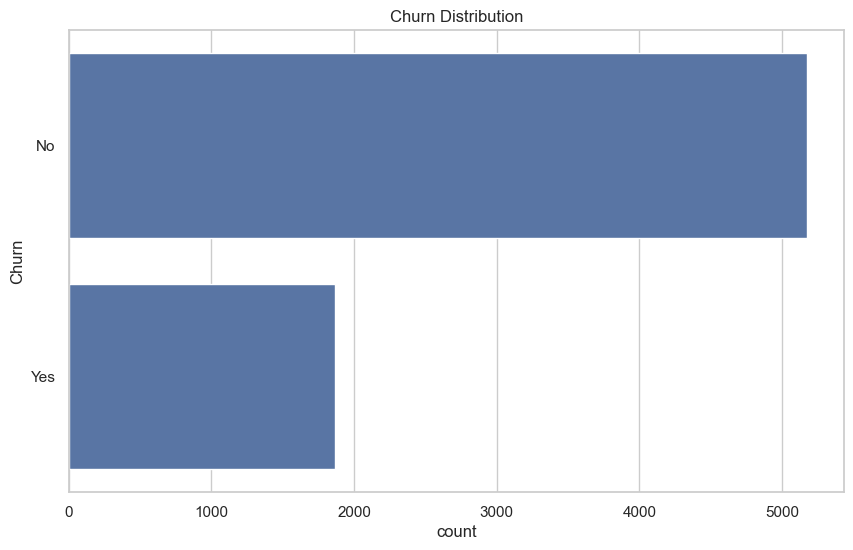

In [37]:
# Visualize Churn Distribution
sns.countplot(data['Churn'])
plt.title('Churn Distribution')
plt.show()

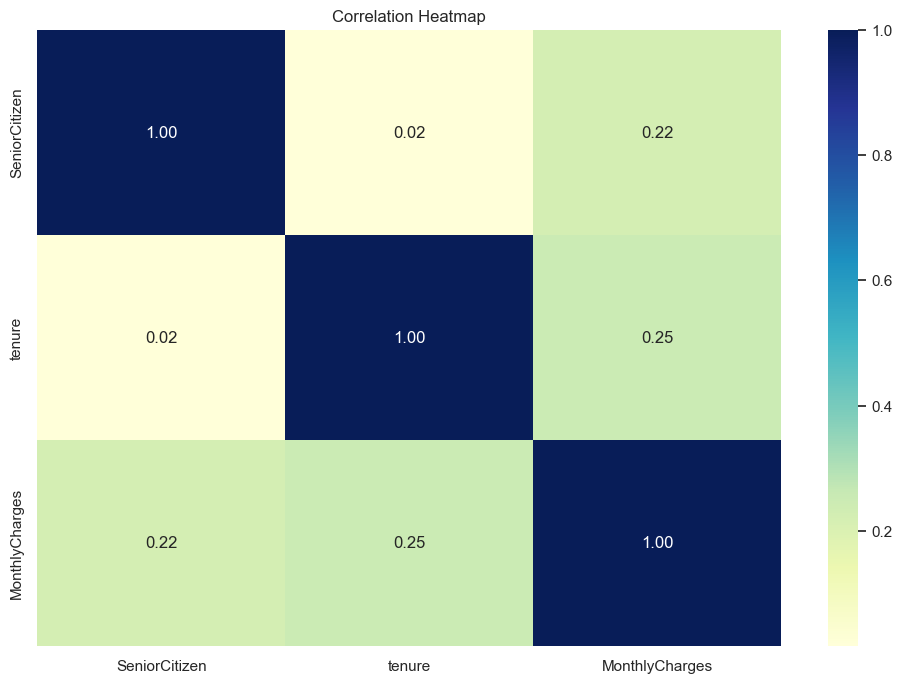

In [38]:
# Correlation Heatmap
# Exclude non-numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

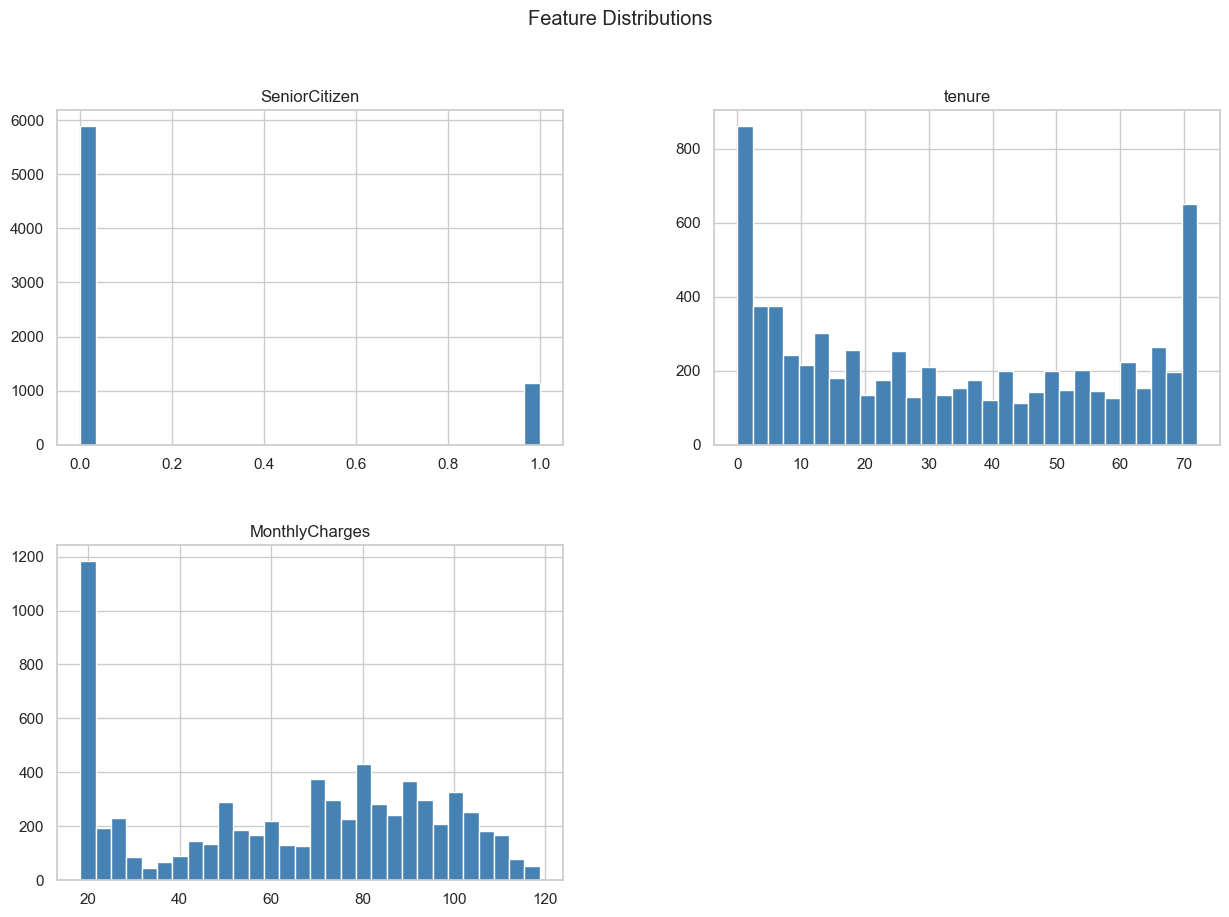

In [15]:
# Distribution of numerical features
data.hist(bins=30, figsize=(15, 10), color="steelblue")
plt.suptitle('Feature Distributions')
plt.show()

In [39]:
# Preprocessing
# Encode Categorical Features
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    if col != 'Churn':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

In [40]:
# Encode the target variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [41]:
# Feature Scaling
scaler = StandardScaler()
numeric_features = data.select_dtypes(include=[np.number]).columns.tolist()
numeric_features.remove('Churn')
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [42]:
# Splitting Data into Training and Testing Sets
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Model Building and Evaluation
# Model 1: Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Model 2: Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Model 3: XGBoost Classifier
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed use_label_encoder parameter
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)


# Model 4: LightGBM Classifier
lgbm_clf = LGBMClassifier(random_state=42)
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)

# Model 5: CatBoost Classifier
cat_clf = CatBoostClassifier(verbose=0, random_state=42)  # verbose=0 suppresses CatBoost output
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)


[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418


In [44]:
# Evaluation Metrics
models = {
    "Logistic Regression": (y_pred_lr, log_reg),
    "Random Forest": (y_pred_rf, rf_clf),
    "XGBoost": (y_pred_xgb, xgb_clf),
    "LightGBM": (y_pred_lgbm, lgbm_clf),
    "CatBoost": (y_pred_cat, cat_clf)
}

In [45]:
# Comparing Models
for model_name, (y_pred, model) in models.items():
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8147622427253371
ROC AUC Score: 0.8606415684163673
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409

Confusion Matrix:
 [[940  96]
 [165 208]]

Model: Random Forest
Accuracy: 0.7963094393186657
ROC AUC Score: 0.8385960644673782
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
 [[942  94]
 [193 180]]

Model: XGBoost
Accuracy: 0.7892122072

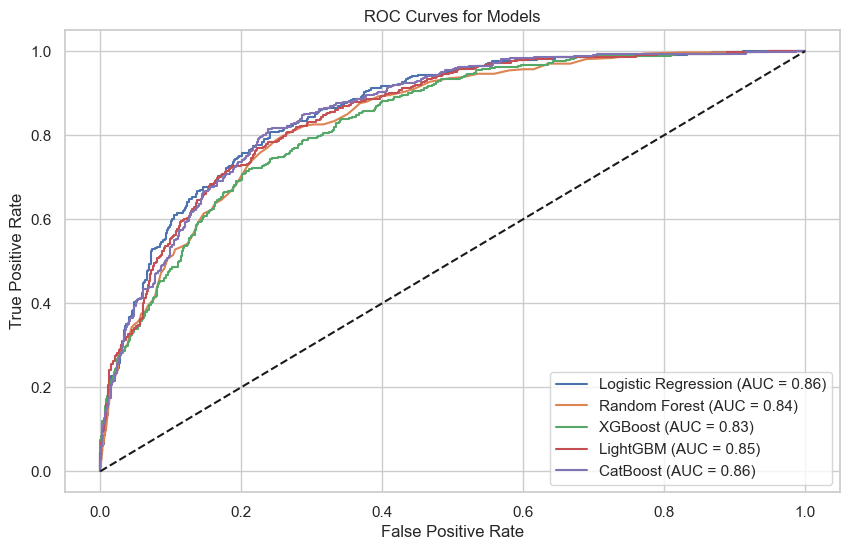

In [46]:
# ROC Curves for each model
for model_name, (y_pred, model) in models.items():
    # Calculate the False Positive Rate and True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})")

# Plotting the diagonal for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend()
plt.show()

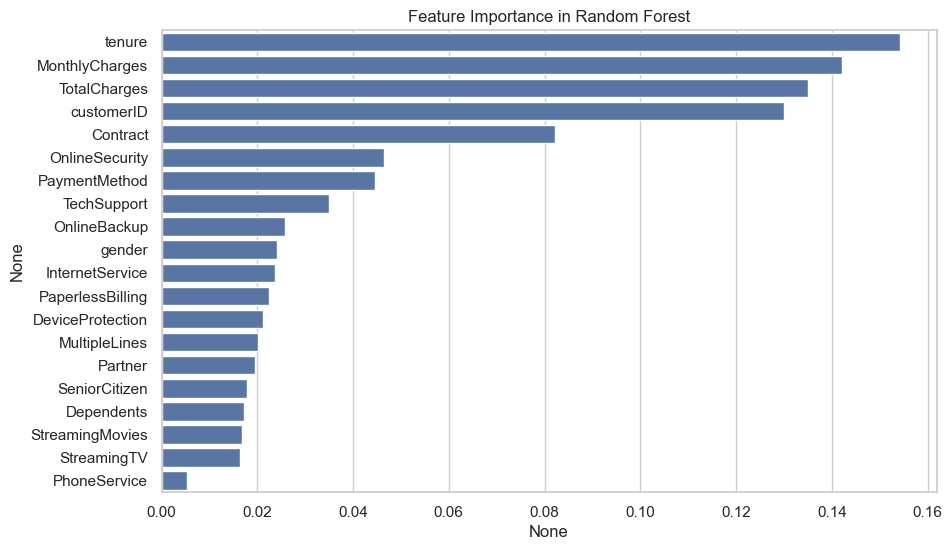

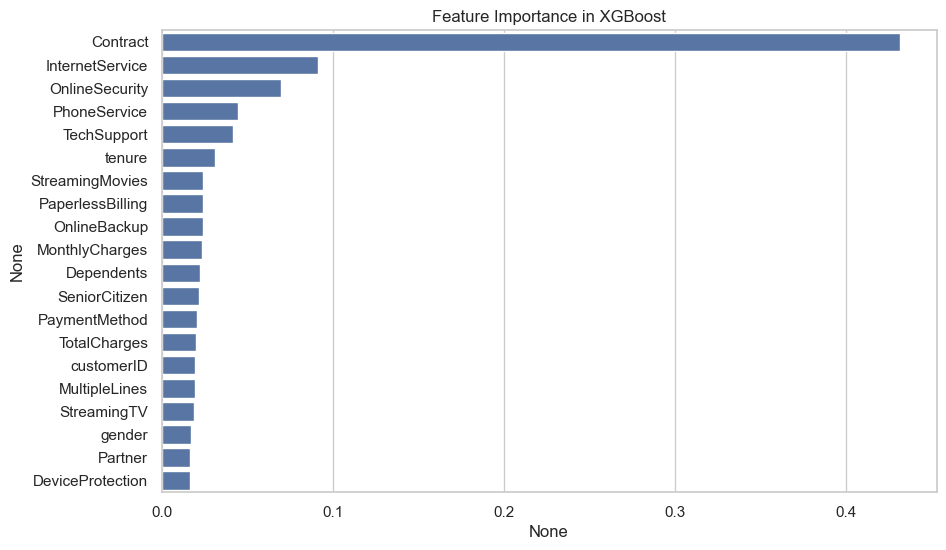

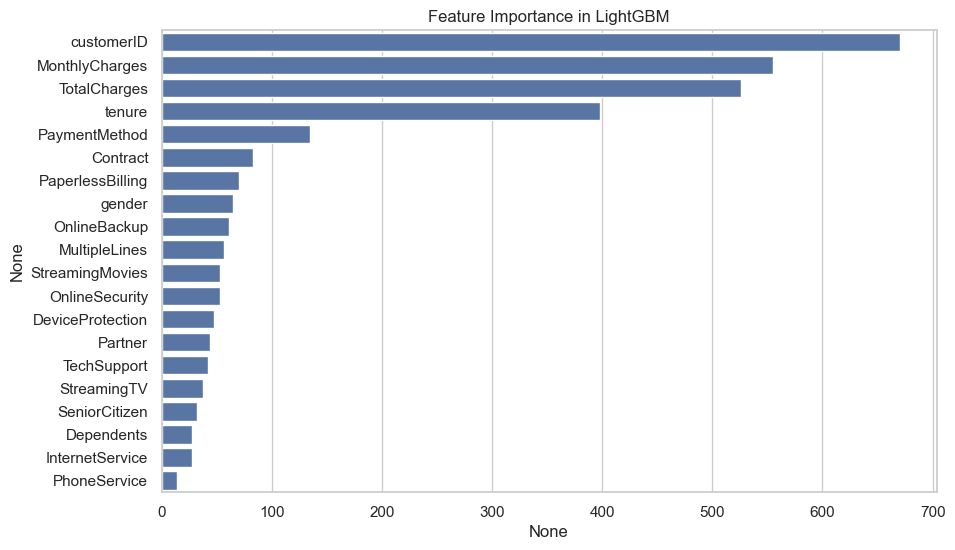

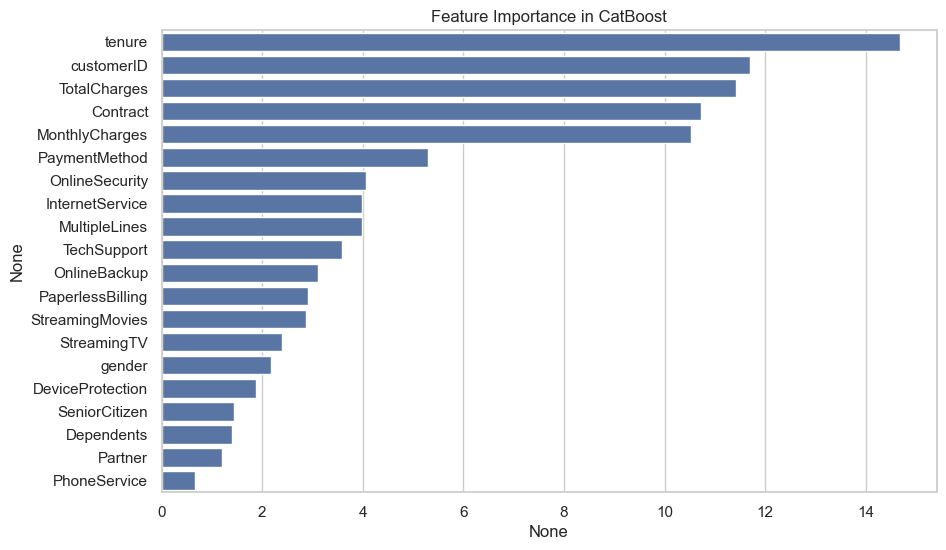

In [48]:
# Feature Importance Analysis for Random Forest and XGBoost
def plot_feature_importance(model, model_name, features):
    feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title(f"Feature Importance in {model_name}")
    plt.show()
#plot_feature_importance(log_reg, "Logistic Regression", X.columns)
plot_feature_importance(rf_clf, "Random Forest", X.columns) 
plot_feature_importance(xgb_clf, "XGBoost", X.columns)
plot_feature_importance(lgbm_clf, "LightGBM", X.columns)
plot_feature_importance(cat_clf, "CatBoost", X.columns)
